## Build your first Deep Learning app within an hour
https://towardsdatascience.com/build-your-first-deep-learning-app-within-an-hour-4e80c120e99f

In [8]:
!pip install -Uq fastbook

In [9]:
# == get search_images_ddg from fastbook 
from fastbook import *

In [10]:
from pathlib import Path
import time

from tqdm import tqdm

In [11]:
breeds = ['siberian husky', 'corgi', 'pomeranian',
          'retriever', 'samayed']
path = Path('dog_breeds')  # define path

In [12]:
# test getting urls (00-is-it-a-bird)
urls = search_images_ddg(breeds[0], max_images=1)
urls[0]

'http://upload.wikimedia.org/wikipedia/commons/6/6d/Siberian_Husky-001.jpg'

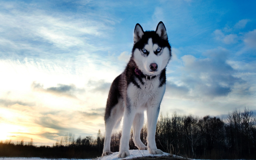

In [8]:
from fastdownload import download_url
dest = 'test_siberian_husky.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
test = search_images_ddg('dragon', max_images=1)
print(test.__dict__)

{'items': ['https://wallpapertag.com/wallpaper/full/5/5/0/986223-large-dragon-warrior-wallpaper-3840x2160-smartphone.jpg']}


In [7]:
# from pathlib import Path
# import time

# breeds = ['siberian husky', 'corgi', 'pomeranian', 'retriever', 'samoyed']

# shorted list as some already there
breeds = ['pomeranian']

max_results=200
path = Path('dogs_breeds') # defining path

for b in tqdm(breeds):     # use tqdm to see progress
    dest = (path/b)
    dest.mkdir(exist_ok=True, parents=True) 
    
    download_images(dest, urls=search_images_ddg(f'photo {b}', 
                                                 max_images=max_results))
    time.sleep(5) 
    download_images(dest, urls=search_images_ddg(f'photo {b} puppy', 
                                                 max_images=max_results))
    time.sleep(5) 
    download_images(dest, urls=search_images_ddg(f'photo {b} sleep', 
                                                 max_images=max_results))
    time.sleep(5) 
    resize_images(path/b, max_size=400, dest=path/b)

100%|██████████| 1/1 [01:12<00:00, 72.78s/it]


In [18]:
# remove bad images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [19]:
# convert data to a format suitable for the Fast.AI model — DataBlock

# dls = DataBlock(
#     blocks=(ImageBlock, CategoryBlock),
#     get_items=get_image_files,
#     get_y=parent_label,
#     splitter=RandomSplitter(valid_pct=0.2, seed=18),
#     item_tfms=[Resize(256, method='squish')]         #make images same size
# ).dataloaders(path, bs=32)

# dls.show_batch(max_n=3)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)


TypeError: 'NoneType' object is not iterable